In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import platform

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [169]:
file_path='./picher_stats_2017.csv'
picher=pd.read_csv(file_path)
file_path='./batter_stats_2017.csv'
batter=pd.read_csv(file_path)

In [170]:
print(batter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       191 non-null    object 
 1   팀명        191 non-null    object 
 2   경기        191 non-null    int64  
 3   타석        191 non-null    int64  
 4   타수        191 non-null    int64  
 5   안타        191 non-null    int64  
 6   홈런        191 non-null    int64  
 7   득점        191 non-null    int64  
 8   타점        191 non-null    int64  
 9   볼넷        191 non-null    int64  
 10  삼진        191 non-null    int64  
 11  도루        191 non-null    int64  
 12  BABIP     191 non-null    float64
 13  타율        191 non-null    float64
 14  출루율       191 non-null    float64
 15  장타율       191 non-null    float64
 16  OPS       191 non-null    float64
 17  wOBA      191 non-null    float64
 18  WAR       191 non-null    float64
 19  연봉(2018)  191 non-null    int64  
 20  연봉(2017)  191 non-null    int64 

# 피처 스케일링

In [171]:
pd.options.mode.chained_assignment=None

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col]=df[col].apply(lambda x:(x-series_mean)/series_std)
    return df

scale_columns = ['경기','타석','타수','안타','홈런','득점'
                ,'타점','볼넷','삼진','도루','BABIP','타율','출루율',
                '장타율','OPS','wOBA','WAR','연봉(2017)']

batter_df = standard_scaling(batter,scale_columns)
batter_df = batter_df.rename(columns={'연봉(2018)':'y'})
batter_df.head(5)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,y,연봉(2017)
0,최정,SK,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,...,-0.448042,0.112293,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,120000,3.264136
1,최형우,KIA,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,...,-0.615839,0.467572,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,150000,4.234754
2,박건우,두산,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,...,2.740086,0.683829,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,37000,0.012569
3,나성범,NC,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,...,2.236697,0.861468,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,43000,0.514054
4,손아섭,롯데,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,...,3.579067,0.560253,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,150000,1.484672


# 범주형 피처 정규화

In [172]:
team_encoding=pd.get_dummies(batter_df['팀명'])
team_encoding.head(5)

,KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [173]:
batter_df = batter_df.drop('팀명',axis=1)
batter_df = batter_df.join(team_encoding)
batter_df.head(5)

,선수명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,...,KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화
0,최정,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,...,0,0,0,0,1,0,0,0,0,0
1,최형우,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,...,1,0,0,0,0,0,0,0,0,0
2,박건우,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,...,0,0,0,0,0,0,1,0,0,0
3,나성범,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,...,0,0,0,1,0,0,0,0,0,0
4,손아섭,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,...,0,0,0,0,0,0,0,1,0,0


# 훈련세트와 테스트 세트로 분리

In [174]:
X = batter_df[batter_df.columns.difference(['선수명','y'])]
Y = batter_df['y']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=19)

In [175]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train,Y_train)
print(lr.coef_)

[  -236.24898991    -97.66532469  -2503.58349949   1253.17014235
  -3501.99662009 -11839.60373399  -1204.5626795    2564.40299851
  32645.18415629    717.04409948  -2360.39995263    957.39849116
   1024.21094579  -2847.89149982   7454.13816003  11446.32337558
   -357.03685464   -508.91600818   7154.15488843  27033.31126951
  -5552.94435452 -19251.75812435 -70019.74085914  58253.63806386
   2589.90191245  -2754.62215006    293.72568287   3918.74111401]


# OLS 회귀분석

In [176]:
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     64.25
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.80e-60
Time:                        11:13:40   Log-Likelihood:                -1567.4
No. Observations:                 152   AIC:                             3189.
Df Residuals:                     125   BIC:                             3270.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.917e+04    602.240     31.830      0.000     1.8e+04    2.04e+04
BABIP       -236.2490   1503.349     -0.157      0.875   -3211.562    2739.065
KIA         1819.2924   2320.077      0.784      0.434   -2772.428    6411.013
KT          -586.6258   2197.943     -0.267      0.790   -4936.628    3763.377
LG          3170.1278   2063.356      1.536      0.127    -913.510    7253.766
NC         -1585.0389   2035.486     -0.779      0.438   -5613.518    2443.440
OPS        -1.184e+04   9690.952     -1.222      0.224    -3.1e+04    7339.993
SK           712.3950   2066.385      0.345      0.731   -3377.238    4802.028
WAR         2564.4030   3269.079      0.784      0.434   -3905.511    9034.317
wOBA        3.265e+04   2.89e+04      1.131      0.260   -2.45e+04    8.98e+04
경기           717.0441   2667.842      0.269      0.789   -4562.946    5997.035
넥센          -443.4422   1948.813     -0.228      0.820   -4300.385    3413.500
도루           957.3985   1020.277      0.938      0.350   -1061.856    2976.653
두산          2941.1687   2323.069      1.266      0.208   -1656.473    7538.811
득점         -2847.8915   3430.496     -0.830      0.408   -9637.270    3941.487
롯데          9371.0959   2199.008      4.262      0.000    5018.987    1.37e+04
볼넷          1.145e+04   3583.856      3.194      0.002    4353.427    1.85e+04
삼성          1559.9209   2002.284      0.779      0.437   -2402.848    5522.690
삼진          -508.9160   2282.110     -0.223      0.824   -5025.495    4007.663
안타          7154.1549   1.13e+04      0.632      0.528   -1.52e+04    2.95e+04
연봉(2017)    2.703e+04   1245.371     21.707      0.000    2.46e+04    2.95e+04
장타율        -5552.9444   5745.149     -0.967      0.336   -1.69e+04    5817.418
출루율        -1.925e+04   1.48e+04     -1.297      0.197   -4.86e+04    1.01e+04
타석         -7.002e+04   3.76e+04     -1.863      0.065   -1.44e+05    4377.499
타수          5.825e+04   3.94e+04      1.479      0.142   -1.97e+04    1.36e+05
타율          2589.9019   3295.695      0.786      0.433   -3932.688    9112.492
타점         -2754.6222   3846.260     -0.716      0.475   -1.04e+04    4857.604
한화          2210.6834   1981.938      1.115      0.267   -1711.818    6133.185
홈런          3918.7411   3053.614      1.283      0.202   -2124.739    9962.222
==============================================================================
Omnibus:                      115.076   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3010.469
Skew:                           2.223   Prob(JB):                         0.00
Kurtosis:                      24.344   Cond. No.                     3.70e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

OLS 회귀 분석표는 R-squared(결정계수)와adj,R-squared(수정 결정계수)가 존재 하는데 이는 회귀분석이 얼마나 잘되었는지 평가하는 지표이다. 1에 가까울 수록 데이터를 잘 설명하는 모델이라 볼 수 있다. R-squared가 0.930으로 데이터를 잘 설명할 수 있는 모델이다.  수정 결정계수는 0.916으로 해당 데이터를 91.6% 표현 할 수 있는 모델이다. 

두번째 표의 p>|t| 정보는 각 피처의 t-statistics가 얼마나 유의미한지에 대한 p-vaule이다. 이것이 0.05이하로 내려가야 유의미한 피처로 판별되므로 여기서는 연봉2017,볼넷이 유의미한 피처로 볼 수 있다. 

In [177]:
platform.system()
if platform.system()=='Windows':
    plt.rc('font',family='Malgun Gothic')
elif platform.system()=='Darwin' : 
     plt.rc('font',family='AppleGothic')
    
plt.rc('axes',unicode_minus=False)

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'KIA'),
 Text(3, 0, 'KT'),
 Text(4, 0, 'LG'),
 Text(5, 0, 'NC'),
 Text(6, 0, 'OPS'),
 Text(7, 0, 'SK'),
 Text(8, 0, 'WAR'),
 Text(9, 0, 'wOBA'),
 Text(10, 0, '경기'),
 Text(11, 0, '넥센'),
 Text(12, 0, '도루'),
 Text(13, 0, '두산'),
 Text(14, 0, '득점'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷'),
 Text(17, 0, '삼성'),
 Text(18, 0, '삼진'),
 Text(19, 0, '안타'),
 Text(20, 0, '연봉(2017)'),
 Text(21, 0, '장타율'),
 Text(22, 0, '출루율'),
 Text(23, 0, '타석'),
 Text(24, 0, '타수'),
 Text(25, 0, '타율'),
 Text(26, 0, '타점'),
 Text(27, 0, '한화'),
 Text(28, 0, '홈런')]

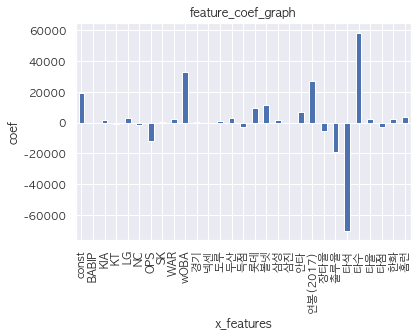

In [178]:
coefs = model.params.tolist()
coefs_series=pd.Series(coefs)

x_labels=model.params.index.tolist()

ax=coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

# 유의미한 피처들과 영향력 높은피처 분석

# 상관관계 분석

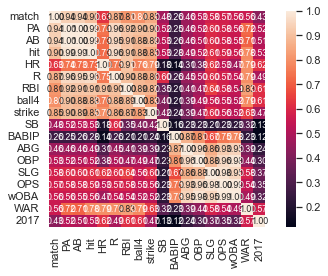

In [179]:
scale_columns= ['경기','타석','타수','안타','홈런','득점'
                ,'타점','볼넷','삼진','도루','BABIP','타율','출루율',
                '장타율','OPS','wOBA','WAR','연봉(2017)']

corr = batter_df[scale_columns].corr(method='pearson')

show_cols = ['match','PA','AB','hit','HR','R',
             'RBI','ball4','strike','SB','BABIP','ABG','OBP'
            ,'SLG','OPS','wOBA','WAR','2017']


sns.set(font_scale=1.0)

hm=sns.heatmap(corr.values,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':8.8},
              yticklabels=show_cols,xticklabels=show_cols)
plt.tight_layout()
plt.show()


피처들의 상관관계를 분석해 히트맵으로 시각화하면 상관관계를 더 잘 확인할 수 있다. 이들의 상관관계를 봤을 때 1.0이 최대이나 이것은 자신과 비교한 것임으로 제외하고 1.0에 가장 근접한 값들을 찾는다. wOBA-OPS,SLG-OPS,OBP-wOBA,hit-AB,hit-PA,PA-PB에서 높은 연관성이 발견됐다.

# 다중 공선성 확인

In [180]:
vif = pd.DataFrame()
X = batter_df[batter_df.columns.difference(['선수명','y'])]

vif['VIF Factor'] = [ variance_inflation_factor(X.values,i)
                    for i in range(X.shape[1])]
vif['features']=X.columns
vif.round(1)

/Users/bang-yewon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,6.0,BABIP
1,1.1,KIA
2,1.1,KT
3,1.2,LG
4,1.1,NC
5,inf,OPS
6,1.2,SK
7,21.5,WAR
8,2190.9,wOBA
9,14.4,경기


# 삭제가 필요한 피처들

현재 상관관계가 높은 피처들은 wOBA-OPS,SLG-OPS,OBP-wOBA,hit-AB,hit-PA 이다.
또한 VIF계수가 높은 피처들을 우선적으로 제거해야한다. 그중에서 중복되는 피처들을 삭제해야한다. 
SLG,OBP,OPS는 inf이며, wOBA :2190.9 이고 안타는 279.6이다. 타석은 2997.4 타수는 3325.3이다.
OPS는 출루율 +장타율이기에 중복되므로 OPS삭제한다.
wOBA는 출루율을을 출루 유형에 따라 분류하기에 출루율과 겹친다. 따라서 VIF 계수가 높은 wOBA삭제한다.
안타는 타수와 타석과 겹치므로 VIF 계수가 높은 타석과 타수를 삭제한다.

위의 상관계수와 VIF Factor를 사용해 독립 변수들을 선택하면 상관관계들 중 중복되는 타석,타수,wOBA,OPS피처를 삭제해야 한다. 

# R2평가 진행

In [181]:
X = batter_df[batter_df.columns.difference(['선수명','y'])]
Y = batter_df['y']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train,Y_train)

print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.9303766951677351
0.9605253564830736


훈련세트와 테스트 세트에 대한 평가 점수로 이 두점수는 최대한 벌어지지 않는 것이 좋다. 그렇기에 테스트 세트와 훈련세트를 선형회귀함수로 진행하고, score으로 훈련세트와 테스트세트를 출력했다. 훈련세트는 약 0.93이고 테스트 세트는 약 0.96이다. 현재 훈련세트가 테스트 세트보다 점수가 좋으므로 과적합이 될 가능성이 있다. 그렇기에 적절한 피처들로 다시 진행을 해야한다. 

# RMSE 평가

In [182]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(Y_train,y_predictions)))
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(Y_test,y_predictions)))

7281.255444348114
8904.286755840132


rmse로 예측모델을 평가했다. 실제값과 예측값의 차이는 약 1573 정도이다. 

# 선정된피처들로 다시 R2평가,RMSE 진행 2 

In [221]:
X = batter_df[['연봉(2017)','볼넷','타석','타수','출루율','장타율','wOBA','안타']]
Y = batter_df['y'] 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train,Y_train)

print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.9178984916102874
0.9602281775684387


In [225]:
Y_predictions=lr.predict(X_train)
print(sqrt(mean_squared_error(Y_train,Y_predictions)))
Y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(Y_test,Y_predictions)))

8218.8927394855
8767.491984451155


먼저 삭제할 피처들 중 OPS만 제외하고 넣었을 시 R2평가의 차이는 늘어났고, RMSE 평가는 초반8900대에서 8700대로 떨어진 것을 볼 수 있다.

# 선정된 피처들로 다시 R2평가, RMSE 진행 3

In [222]:
X = batter_df[['연봉(2017)','볼넷','타석','타수','출루율','장타율','안타']]
Y = batter_df['y'] 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train,Y_train)

print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.9175143474280939
0.9608068847056241


In [224]:
Y_predictions=lr.predict(X_train)
print(sqrt(mean_squared_error(Y_train,Y_predictions)))
Y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(Y_test,Y_predictions)))

8218.8927394855
8767.491984451155


wOBA를 제외했을 시 RMSE평가는 그대로이나 R2평가에서 미세한 차이가 줄어듦을 알 수 있다.

# 선정된 피처들로 다시 R2평가,RMSE 진행 4

In [223]:
X = batter_df[['연봉(2017)','볼넷','출루율','장타율','안타']]
Y = batter_df['y'] 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train,Y_train)

print(model.score(X_train,Y_train)) 
print(model.score(X_test,Y_test))

0.9112907873093428
0.9617289219120474


In [226]:
Y_predictions=lr.predict(X_train)
print(sqrt(mean_squared_error(Y_train,Y_predictions)))
Y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(Y_test,Y_predictions)))

8218.8927394855
8767.491984451155


타석,타수를 제외했을 시 RMSE는 그대로이나, R2평가가 미세하게 1에 더 가까워진 것을 알 수 있다.

# 피처 선정이유

회귀분석,히트맵, 시각화 막대그래프로 유의미한 피처와 영향력 있는 피처들을 선별한 후 VIF계수로 삭제할 피처들을 선정했다. 그렇게 중복된 피처들을 삭제하고, 오차범위가 많이 발생하는 피처들을 삭제해서 최종 '연봉(2017)','볼넷','출루율','장타율','안타'이 선정되었다. 

# 예측 연봉과 실제 연봉 비교하기

In [227]:
file_path='./batter_stats_2017.csv'
batter=pd.read_csv(file_path)
x = batter_df[['연봉(2017)','볼넷','출루율','장타율','안타']]
predict_2018_salary = lr.predict(x) 
batter_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [231]:
batter=batter[['선수명','연봉(2017)']]

result_df = batter_df.sort_values(by=['y'],ascending=False)
result_df.drop(['연봉(2017)'],axis=1,inplace=True,errors='ignore')

result_df = result_df.merge(batter,on=['선수명'],how='left')
result_df=result_df[['선수명','y','예측연봉(2018)','연봉(2017)']]
result_df.columns = ['선수명','실제연봉(2018)','예측연봉(2018)','작년연봉(2017)'] 

result_df = result_df[result_df['작년연봉(2017)'] !=result_df['실제연봉(2018)']] 

result_df =result_df.reset_index()
result_df = result_df.iloc[:10,:] 
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,3,손아섭,150000,77853.565957,65000
1,4,러프,140000,114142.299892,110000
2,9,번즈,73000,61901.244733,60000
3,10,스크럭스,70000,87640.402323,80000
4,17,양의지,60000,52149.689291,48000
5,20,손시헌,50000,40090.563036,40000
6,21,로맥,50000,39098.082496,30000
7,23,나성범,43000,44453.790777,35000
8,25,이용규,40000,82684.927042,90000
9,28,김주찬,40000,62394.873567,60000


In [229]:

set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

{'.Aqua Kana',
 '.Arabic UI Display',
 '.Arabic UI Text',
 '.Keyboard',
 '.New York',
 '.SF Compact',
 '.SF Compact Rounded',
 '.SF NS Mono',
 '.SF NS Rounded',
 'Academy Engraved LET',
 'Al Bayan',
 'Al Nile',
 'Al Tarikh',
 'American Typewriter',
 'Andale Mono',
 'Apple Braille',
 'Apple Chancery',
 'Apple SD Gothic Neo',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial Black',
 'Arial Hebrew',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Athelas',
 'Avenir',
 'Avenir Next',
 'Avenir Next Condensed',
 'Ayuthaya',
 'Baghdad',
 'Bangla MN',
 'Bangla Sangam MN',
 'Baskerville',
 'Beirut',
 'Big Caslon',
 'Bodoni 72',
 'Bodoni 72 Oldstyle',
 'Bodoni 72 Smallcaps',
 'Bodoni Ornaments',
 'Bradley Hand',
 'Brush Script MT',
 'Chalkboard',
 'Chalkboard SE',
 'Chalkduster',
 'Charter',
 'Cochin',
 'Comic Sans MS',
 'Copperplate',
 'Corsiva Hebrew',
 'Courier New',
 'D2Coding',
 'DIN Alternate',
 'DIN Condensed',
 'Damascus',
 'DecoType Naskh',
 'DejaVu

<AxesSubplot:xlabel='선수명'>

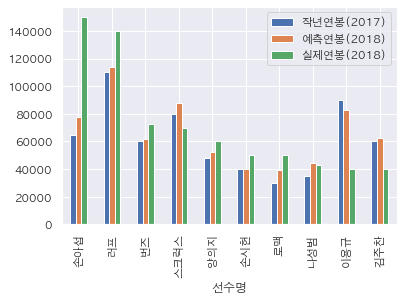

In [230]:
mpl.rc('font',family ='AppleGothic')
result_df.plot(x='선수명',y=['작년연봉(2017)','예측연봉(2018)','실제연봉(2018)'],kind='bar')